In [1]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import math
import numpy as np

d:\all_programming\MSD\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
graphite_water_psf = r'D:\all_programming\MSD\data_files\unwrapped\graphite_water.psf'
graphite_trajectory_dcd = r'D:\all_programming\MSD\data_files\unwrapped\output_per_20ps.dcd'

global_uni = mda.Universe(graphite_water_psf,graphite_trajectory_dcd)
Oxg_uni = global_uni.select_atoms('resname SPCE and name OW')
# Importing data

d:\all_programming\MSD\.venv\Lib\site-packages\MDAnalysis\coordinates\DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
def plot_dict(data):
    # Number of keys in the dictionary
    num_keys = len(data)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_keys, 1, figsize=(8, num_keys * 4))
    
    # If there's only one subplot, axes is not a list, so we need to make it a list
    if num_keys == 1:
        axes = [axes]
    
    # Loop through each key in the dictionary
    for i, key in enumerate(data):
        x_vals = range(len(data[key]))
        y_vals = data[key]
        
        # Plot the data
        axes[i].plot(x_vals, y_vals, marker='o')
        axes[i].set_title(f'Plot between partition {key}-{key + 1}')
        axes[i].set_xlabel('Time (ps)')
        axes[i].set_ylabel('Average MSD (Å²)')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


In [4]:
def calculate_msd(position_dict):
    x_vals = np.array(position_dict['x_vals'])
    y_vals = np.array(position_dict['y_vals'])
    z_vals = np.array(position_dict['z_vals'])
    num_points = len(x_vals)
    msd = np.zeros(num_points)
    for dt in range(1, num_points):
        displacements = np.square(x_vals[dt:] - x_vals[:-dt]) + np.square(y_vals[dt:] - y_vals[:-dt]) + np.square(z_vals[dt:] - z_vals[:-dt])
        msd[dt] = np.mean(displacements)
    return msd

In [5]:
def matrix_addition(array1, array2):
    if len(array1) > len(array2):
        array2 = np.pad(array2, (0, len(array1) - len(array2)), 'constant')
    else:
        array1 = np.pad(array1, (0, len(array2) - len(array1)), 'constant')
    return array1 + array2

In [6]:
partition_height = 65
partition_cuts = 4
partition = []

for i in range(partition_cuts):
    partition.append(65 * ( (i + 1) / partition_cuts))

In [7]:
position_dict = {}
msd_dict = {}

for i in range(partition_cuts):
    msd_dict[i] = {}

for atom_num in range(len(Oxg_uni)):
    position_dict[atom_num] = {'location':'DNE','x_vals':[],'y_vals':[],'z_vals':[]}

    for frame in range(len(global_uni.trajectory)):
        global_uni.trajectory[frame]
        oxg_pos = Oxg_uni.positions
        wanted_atom_pos = oxg_pos[atom_num]
        current_z = wanted_atom_pos[2]

        for i in range(len(partition)):
            if current_z < partition[i]:
                current_part = i
                break


        if frame == 0:
            position_dict[atom_num]['location'] = current_part
        if frame != 0 and position_dict[atom_num]['location'] != current_part:
            break

        position_dict[atom_num]['x_vals'].append(wanted_atom_pos[0])
        position_dict[atom_num]['y_vals'].append(wanted_atom_pos[1])
        position_dict[atom_num]['z_vals'].append(wanted_atom_pos[2])

    individual_msd = calculate_msd(position_dict[atom_num])
    msd_dict[position_dict[atom_num]['location']][atom_num] = [individual_msd, len(individual_msd)]

In [8]:
len_count = {}
msd_len = {}

for key in msd_dict.keys():
    len_count[key] = {}
    msd_len[key] = []

    for atom_num in msd_dict[key].keys():
        msd_len[key].append(msd_dict[key][atom_num][1])

for i in range(partition_cuts):
    for j in range(1, max(msd_len[i]) + 1):
        len_count[i][j] = 0

for key in len_count.keys():
    for item in msd_len[key]:
        for i in range(1, item + 1):
            len_count[key][i] += 1

In [9]:
msd_summed_dict = {}

for key in msd_dict.keys():
    msd_summed_dict[key] = []

    for atom_num in msd_dict[key].keys():
        msd_summed_dict[key] = matrix_addition(msd_dict[key][atom_num][0],msd_summed_dict[key])

In [10]:
averaged_msd = {}

for key in msd_summed_dict.keys():
    averaged_msd[key] = []
    for i in range(len(msd_summed_dict[key])):
        averaged_msd[key].append(msd_summed_dict[key][i] / len_count[key][i + 1])

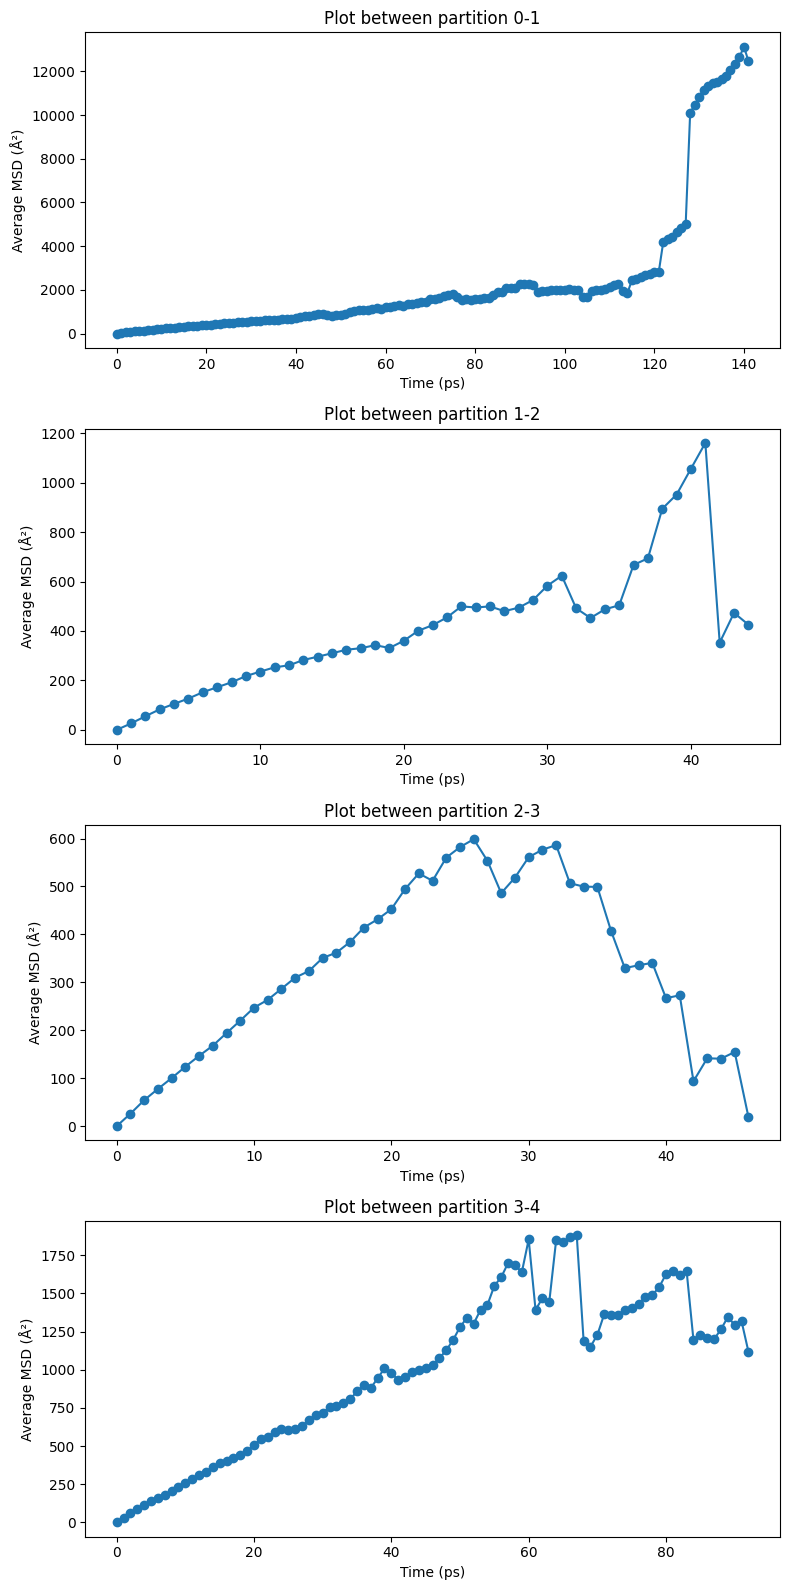

In [11]:
plot_dict(averaged_msd)

In [18]:
y_vals = averaged_msd[0][:120]
x_vals = list(range(len(y_vals)))[:120]

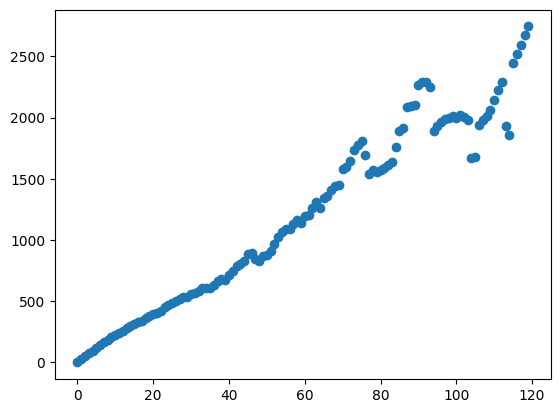

In [19]:
plt.scatter(x_vals, y_vals)

In [17]:
print(y_vals)
print(x_vals)

[0.0, 25.713146558862764, 51.777165736483035, 75.14426399310676, 97.68838780523322, 119.25089813903406, 139.6043378964959, 163.5343391432825, 184.21468769111254, 204.29764185328494, 221.992244854925, 240.1545456236059, 260.7830124038258, 278.9326179693193, 297.433284677485, 314.98117081413056, 331.23558013008795, 341.143324232835, 360.6063484930223, 376.6852688916524, 395.78282073448446, 407.3234838126362, 423.2660522315892, 451.52125352378783, 469.19302168501184, 489.3379647921672, 498.1821904761769, 518.9677714553534, 534.3829530822444, 537.8456595072182, 556.3457981088308, 567.3734033299588, 580.5653564021701, 606.8727248191833, 605.4999728265561, 612.2387677545416, 629.2856948375702, 662.9411052585572, 681.5978507385254, 673.388044493539, 714.1520066171322, 747.2362072684548, 785.4679044221577, 804.4232207588527, 829.5802051804283, 887.6560789744059, 896.6522595332219, 843.7007557636982, 827.8615995134626, 870.4603780490249, 874.7577613592148, 908.8859732491629, 969.7469018192614, 

In [12]:
raise KeyError

KeyError: 

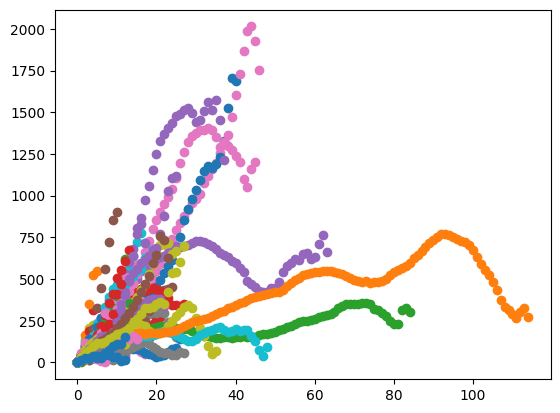

In [ ]:
for atom_num in msd_dict.keys():

    plt.scatter(range(len(msd_dict[atom_num][0])), msd_dict[atom_num][0])
    plt.plot()
    if atom_num == 100:
        break